# Este analisis sera un analisis predictivo de popularidad de espotify, basandonos en sus caracteristicas de audio
El analisis lo haremos enfocado en la musica Moderna de 1990 en adelante ya que con el cambio generacional y el paso del tiempo los gustos y las canciones van cambiando o pasando de moda

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")
import ast

# Descripcion: 
### Información de Identificación

    id: El identificador único de la canción en Spotify.

    artists: Lista de los artistas que participan en el tema.

    name: El título de la canción.

    release_date: Fecha de lanzamiento (puede ser el año solo o la fecha completa).

    year: El año de lanzamiento.

    explicit: Indica si la canción tiene contenido explícito (1 = Sí, 0 = No).

    popularity: La popularidad de la canción (de 0 a 100), basada en el número de reproducciones y qué tan recientes son.

### Atributos de Audio (Métricas de 0.0 a 1.0)

#### Estas columnas describen la vibra escencial de la música:

    acousticness: Qué tan acústica es. 1.0 significa que es muy probable que no use instrumentos eléctricos.

    danceability: Qué tan apta es la canción para bailar basándose en el ritmo, la estabilidad del tempo y la fuerza del beat.

    energy: Representa la intensidad y actividad. Las canciones con mucha energía suenan rápidas, fuertes y ruidosas (como el metal).

    instrumentalness: Predice si la canción no tiene voz. Cuanto más cerca de 1.0, menos voz tiene.

    liveness: Detecta la presencia de público en la grabación (si es en vivo).

    speechiness: Detecta palabras habladas. Un valor alto indica algo parecido a un podcast o rap; un valor bajo indica música pura.

    valence: Describe la "positividad" musical. Valores altos suenan alegres o eufóricos; valores bajos suenan tristes o enojados.

#### Parámetros Técnicos

    duration_ms: La duración de la canción en milisegundos.

    key: La tonalidad de la canción (usando notación estándar, ej: 0 = C, 1 = C♯, etc.).

    loudness: El volumen promedio en decibeles (dB). Suele ser un valor negativo entre -60 y 0.

    mode: Indica la modalidad (1 = Mayor, 0 = Menor) de la escala musical.

    tempo: El ritmo de la canción en pulsaciones por minuto (BPM).


In [3]:
df = pd.read_csv('../dataset/train.csv')
df.head()

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity
0,7pQSmQ0l7QdBeL9X6CEMbH,['Erroll Garner'],I'll Remember April - Original Edited Concert ...,1955,0.92300,0.438,257693,0.602,0,0.658000,8,0.9500,-14.565,1,1955,0.0408,122.289,0.546,24
1,2g8MTBFRUSFKbY5RQiSSEE,['Maison & Dragen'],Chinese New Year - Radio Edit,2014,0.00019,0.477,193968,0.834,0,0.978000,4,0.3960,-6.534,0,2014-05-02,0.0396,130.007,0.516,0
2,2LcJoQ5SDUZrC2qUjWMEdF,"['Yoel Lerner', 'Mazi Cohen']",השפן הקטן,1981,0.90000,0.617,56827,0.272,0,0.000000,7,0.0879,-16.818,1,1981-04-01,0.0577,83.244,0.807,38
3,6RzHyUtRNARYyn2AIuoLnY,['Barbra Streisand'],Run Wild,1980,0.29400,0.377,247467,0.269,0,0.000478,4,0.1440,-16.766,1,1980-09-23,0.0268,82.302,0.196,40
4,6Kd0I5es8911FZpYhFS053,['Willie Nelson'],Till I Gain Control Again - Live,1975,0.49400,0.501,351560,0.218,0,0.008110,0,0.2970,-13.045,1,1975,0.0283,77.854,0.239,20


# Limpieza y analisis de vista del Dataset

In [12]:
print("Valores Nulos por Columna:")
print(df.isnull().sum())

print(f"\nFilas duplicadas: {df.duplicated().sum()}")

print("\nResumen Estadístico:")
print(df.describe())

Valores Nulos por Columna:
id                  0
artists             0
name                0
year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
release_date        0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

Filas duplicadas: 0

Resumen Estadístico:
                year   acousticness   danceability   duration_ms  \
count  129172.000000  129172.000000  129172.000000  1.291720e+05   
mean     1976.579762       0.501950       0.536076  2.328895e+05   
std        26.722407       0.379088       0.175803  1.492669e+05   
min      1920.000000       0.000000       0.000000  4.937000e+03   
25%      1955.000000       0.091800       0.414000  1.662930e+05   
50%      1977.000000       0.523000       0.547000  2.056665e+05   
75%      1998.000000   

## Eliminaremos la columna de release_date, ya que es redundante con la columna date, y es mejor analizar solo el ano en el que se realizo y tambien id y el nombre de la cancion ya que no son de utilidad en lo que estaremos analizando


In [21]:
print(f"Canciones del dataset previo a la limpieza : {df.shape[0]} canciones. \n")
df_clean = df.drop(columns=['id', 'name', 'release_date'])
df_clean = df_clean[df_clean['year'] >= 1990]
df_clean = df_clean.reset_index(drop=True)

print(f"Dataset listo con {df_clean.shape[0]} canciones.\n")
print(f"Eliminamos un total de: {df.shape[0]- df_clean.shape[0] } canciones\n")
print(df_clean.head())

Canciones del dataset previo a la limpieza : 129172 canciones. 

Dataset listo con 45486 canciones.

Eliminamos un total de: 83686 canciones

                                  artists  year  acousticness  danceability  \
0                     ['Maison & Dragen']  2014      0.000190         0.477   
1                        ['Mladen Tomic']  2013      0.000581         0.805   
2  ['Ramon Ayala Y Sus Bravos Del Norte']  2010      0.453000         0.590   
3                       ['Fleetwood Mac']  2018      0.002640         0.469   
4                        ['Frankie Ruiz']  1996      0.195000         0.838   

   duration_ms  energy  explicit  instrumentalness  key  liveness  loudness  \
0       193968   0.834         0          0.978000    4    0.3960    -6.534   
1       395050   0.663         0          0.927000    7    0.0715    -8.338   
2       254027   0.722         0          0.000385    9    0.1110    -5.752   
3       253760   0.730         0          0.048200    0    0.1500  

In [25]:
def extraer_primer_artista(lista_str):
    try:
        # Convierte el string "['Artista']" en una lista real de Python
        lista = ast.literal_eval(lista_str)
        return lista[0]
    except:
        return lista_str

df_clean['main_artist'] = df_clean['artists'].apply(extraer_primer_artista)
df_clean.head()

,artists,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity,main_artist
0,['Maison & Dragen'],2014,0.000190,0.477,193968,0.834,0,0.978000,4,0.3960,-6.534,0,0.0396,130.007,0.516,0,Maison & Dragen
1,['Mladen Tomic'],2013,0.000581,0.805,395050,0.663,0,0.927000,7,0.0715,-8.338,1,0.0635,127.008,0.111,0,Mladen Tomic
2,['Ramon Ayala Y Sus Bravos Del Norte'],2010,0.453000,0.590,254027,0.722,0,0.000385,9,0.1110,-5.752,1,0.1670,150.744,0.401,47,Ramon Ayala Y Sus Bravos Del Norte
3,['Fleetwood Mac'],2018,0.002640,0.469,253760,0.730,0,0.048200,0,0.1500,-11.890,0,0.0358,145.781,0.573,32,Fleetwood Mac
4,['Frankie Ruiz'],1996,0.195000,0.838,267467,0.723,0,0.000000,5,0.0468,-8.384,0,0.0447,93.302,0.934,57,Frankie Ruiz


In [42]:
import ast
df_clean['main_artist'] = df_clean['artists'].apply(lambda x: ast.literal_eval(x)[0] if x.startswith('[') else x)

# Calculamos el top 10 de artistas con mejor promedio de popularidad
# (Solo incluimos artistas con más de 5 canciones para que sea justo)
artist_stats = df_clean.groupby('main_artist')['popularity'].agg(['mean', 'count'])
top_popular_artists = artist_stats[artist_stats['count'] > 5].sort_values(by='mean', ascending=False).head(10)

print("Top 10 Artistas más populares (Promedio):")
print(top_popular_artists)

Top 10 Artistas más populares (Promedio):
                    mean  count
main_artist                    
Maluma         83.666667      6
Dua Lipa       78.800000     10
Pop Smoke      78.466667     15
Bad Bunny      78.275000     40
Harry Styles   78.052632     19
The Kid LAROI  77.117647     17
Billie Eilish  76.500000     26
James Arthur   76.333333      6
BLACKPINK      76.285714      7
Juice WRLD     75.804348     46


## Crearemos una nueva columna usando main_artist y su popularity, donde sea el peso que tiene el artista basandonos en su popularidad promedio evitando artistas que solo tengan una cancion popular

In [54]:
artist_popularity_map = df_clean.groupby('main_artist')['popularity'].mean().to_dict()

df_clean['artist_popularity'] = df_clean['main_artist'].map(artist_popularity_map)

df_final = df_clean.drop(columns=['artists', 'main_artist', 'artist_avg_popularity'])

print("Primeras filas del dataset listo para el modelo:")
print(df_final.head())

Primeras filas del dataset listo para el modelo:
    year  acousticness  danceability  duration_ms  energy  explicit  \
1   2014      0.000190         0.477       193968   0.834         0   
5   2013      0.000581         0.805       395050   0.663         0   
6   2010      0.453000         0.590       254027   0.722         0   
7   2018      0.002640         0.469       253760   0.730         0   
26  1996      0.195000         0.838       267467   0.723         0   

    instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
1           0.978000    4    0.3960    -6.534     0       0.0396  130.007   
5           0.927000    7    0.0715    -8.338     1       0.0635  127.008   
6           0.000385    9    0.1110    -5.752     1       0.1670  150.744   
7           0.048200    0    0.1500   -11.890     0       0.0358  145.781   
26          0.000000    5    0.0468    -8.384     0       0.0447   93.302   

    valence  popularity  artist_popularity  
1     0.516     

# Visualizacion de Datos y correlaciones

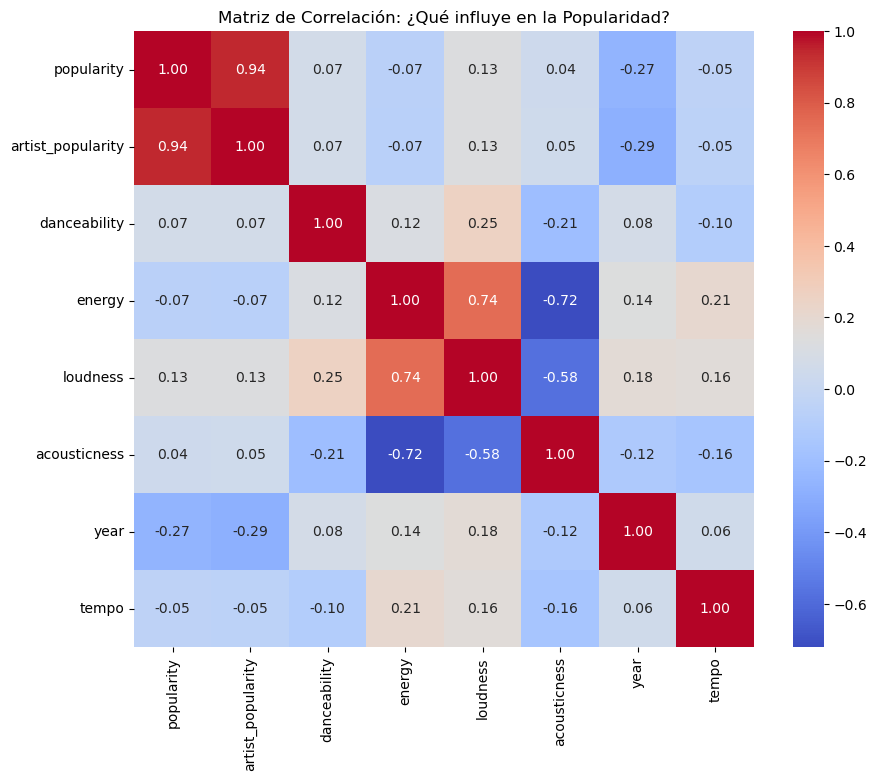

In [55]:
cols_interes = ['popularity', 'artist_popularity', 'danceability', 'energy', 
                'loudness', 'acousticness', 'year', 'tempo']

plt.figure(figsize=(10, 8))
sns.heatmap(df_clean[cols_interes].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación: ¿Qué influye en la Popularidad?')
plt.show()

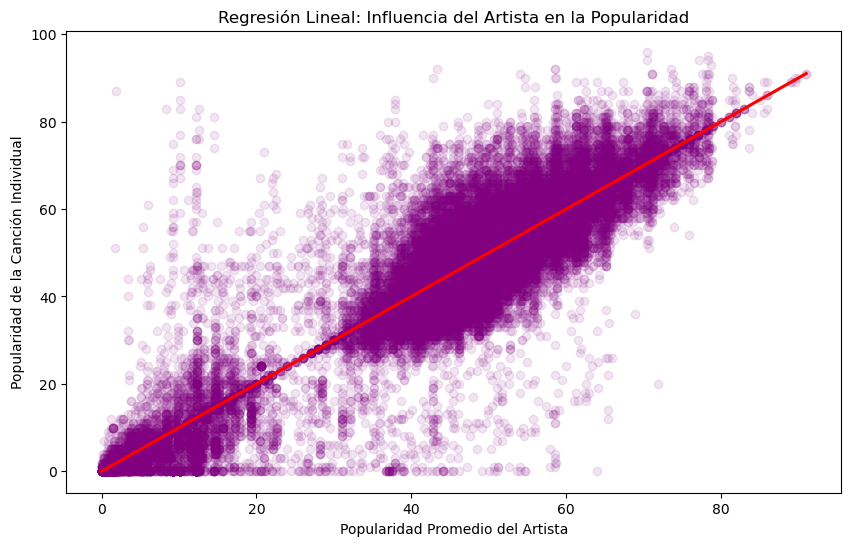

In [58]:
plt.figure(figsize=(10, 6))

sns.regplot(data=df_clean, x='artist_popularity', y='popularity', 
            scatter_kws={'alpha':0.1, 'color':'purple'}, 
            line_kws={'color':'red'})

plt.title('Regresión Lineal: Influencia del Artista en la Popularidad')
plt.xlabel('Popularidad Promedio del Artista')
plt.ylabel('Popularidad de la Canción Individual')
plt.show()

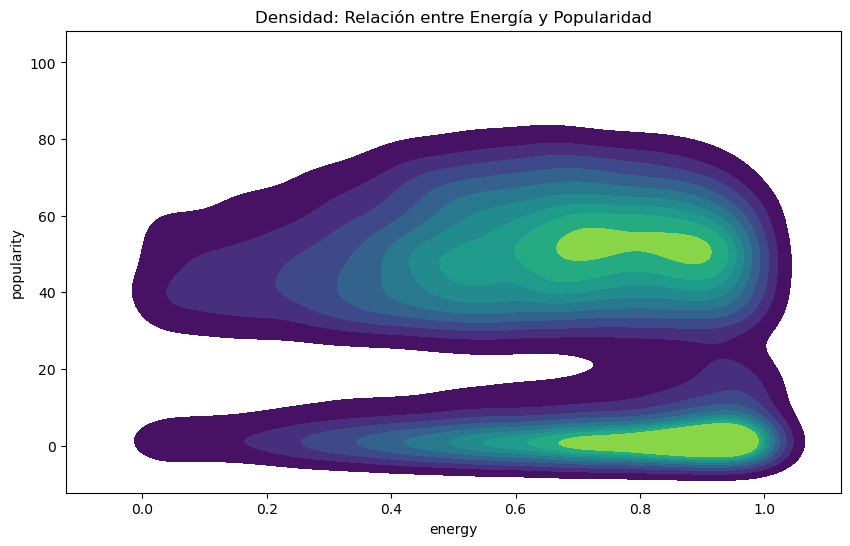

In [62]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_clean, x='energy', y='popularity', fill=True, cmap='viridis')
plt.title('Densidad: Relación entre Energía y Popularidad')
plt.show()

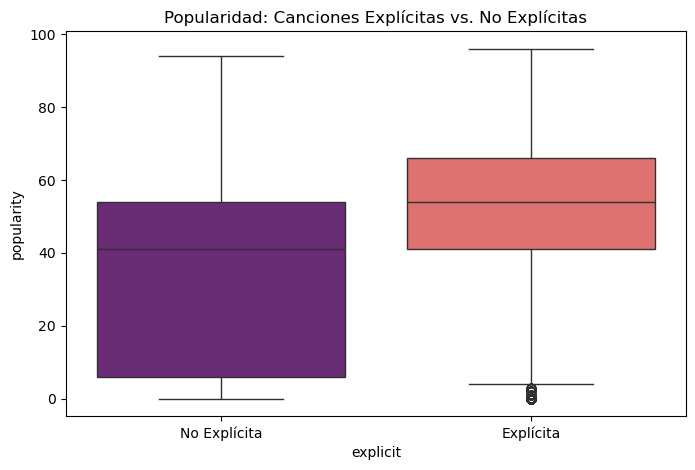

In [57]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='explicit', y='popularity', data=df_clean, palette='magma')
plt.title('Popularidad: Canciones Explícitas vs. No Explícitas')
plt.xticks([0, 1], ['No Explícita', 'Explícita'])
plt.show()

# Entrenamiento del modelo predictorio

In [63]:
X = df_final.drop(columns=['popularity'])
y = df_final['popularity']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Entrenando con {len(X_train)} canciones y probando con {len(X_test)}.")

Entrenando con 36388 canciones y probando con 9098.


In [66]:
modelo_spotify = RandomForestRegressor(n_estimators=100, random_state=42)

modelo_spotify.fit(X_train, y_train)

print("¡Modelo entrenado con éxito!")

¡Modelo entrenado con éxito!


In [67]:
predicciones = modelo_spotify.predict(X_test)

mae = mean_absolute_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)

print(f"Error Medio Absoluto (MAE): {mae:.2f} puntos")
print(f"Precisión (R² Score): {r2:.2f}")

Error Medio Absoluto (MAE): 4.61 puntos
Precisión (R² Score): 0.91


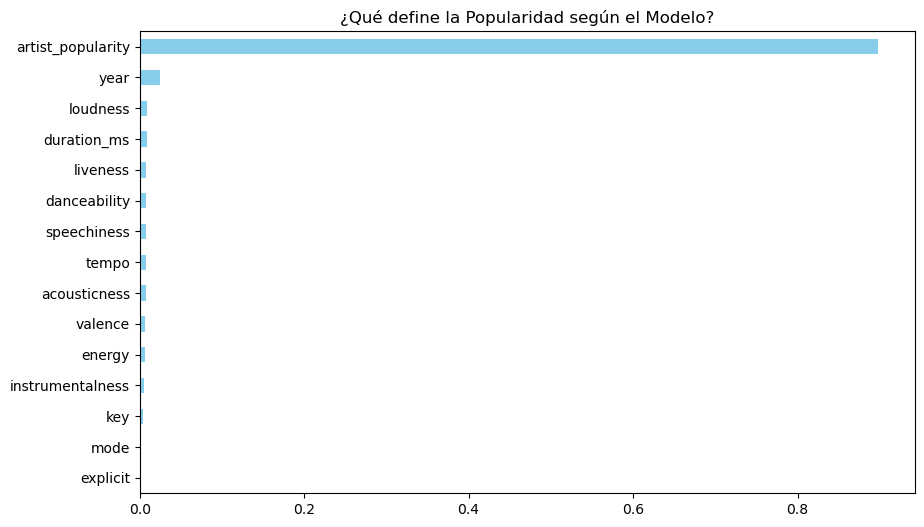

In [68]:
importancias = pd.Series(modelo_spotify.feature_importances_, index=X.columns)
importancias.sort_values().plot(kind='barh', color='skyblue', figsize=(10, 6))
plt.title('¿Qué define la Popularidad según el Modelo?')
plt.show()

In [69]:
predicciones = modelo_spotify.predict(X_test)

mae = mean_absolute_error(y_test, predicciones)

r2 = r2_score(y_test, predicciones)

print(f"Error Medio Absoluto (MAE): {mae:.2f} puntos")
print(f"Precisión del Modelo (R²): {r2:.2f}")

Error Medio Absoluto (MAE): 4.61 puntos
Precisión del Modelo (R²): 0.91


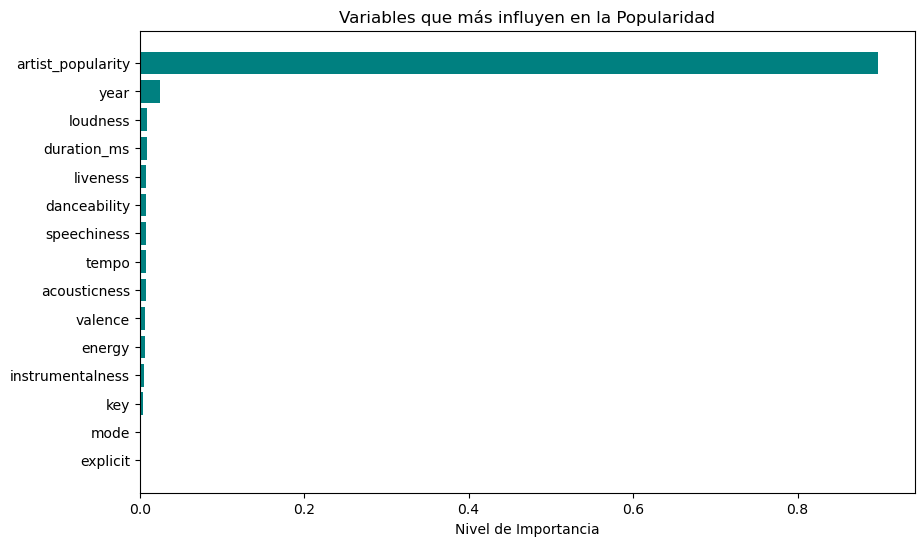

In [70]:
importancias = pd.DataFrame({'Variable': X.columns, 'Importancia': modelo_spotify.feature_importances_})
importancias = importancias.sort_values(by='Importancia', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importancias['Variable'], importancias['Importancia'], color='teal')
plt.title('Variables que más influyen en la Popularidad')
plt.xlabel('Nivel de Importancia')
plt.show()

In [71]:
# Creamos los datos de nuestra canción nueva
# Nota: Los valores deben estar en los rangos del dataset (ej. danceability 0 a 1)
mi_nueva_cancion = pd.DataFrame([{
    'valence': 0.75,        
    'year': 2024,            
    'acousticness': 0.1,     
    'danceability': 0.85,   
    'duration_ms': 180000,   
    'energy': 0.8,           
    'explicit': 1,           
    'instrumentalness': 0.0,
    'key': 5,                
    'liveness': 0.12,        
    'loudness': -5.0,        
    'mode': 1,               
    'speechiness': 0.05,     
    'tempo': 125.0,          
    'artist_popularity': 85.0 
}])

resultado = modelo_spotify.predict(mi_nueva_cancion)

print(f"--- SIMULADOR DE ÉXITOS ---")
print(f"La popularidad estimada para tu canción es: {resultado[0]:.2f} / 100")

--- SIMULADOR DE ÉXITOS ---
La popularidad estimada para tu canción es: 82.23 / 100


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

X_puro = df_final.drop(columns=['popularity', 'artist_popularity'])
y = df_final['popularity']

X_train, X_test, y_train, y_test = train_test_split(X_puro, y, test_size=0.2, random_state=42)

print(f"Variables analizadas: {X_puro.columns.tolist()}")

Variables analizadas: ['year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']


In [74]:
# Entrenamos
modelo_puro = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_puro.fit(X_train, y_train)

# Predecimos y evaluamos
preds = modelo_puro.predict(X_test)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f"--- RESULTADOS SIN ARTISTA ---")
print(f"Error Medio (MAE): {mae:.2f} puntos")
print(f"Precisión (R²): {r2:.2f}")

--- RESULTADOS SIN ARTISTA ---
Error Medio (MAE): 12.03 puntos
Precisión (R²): 0.52


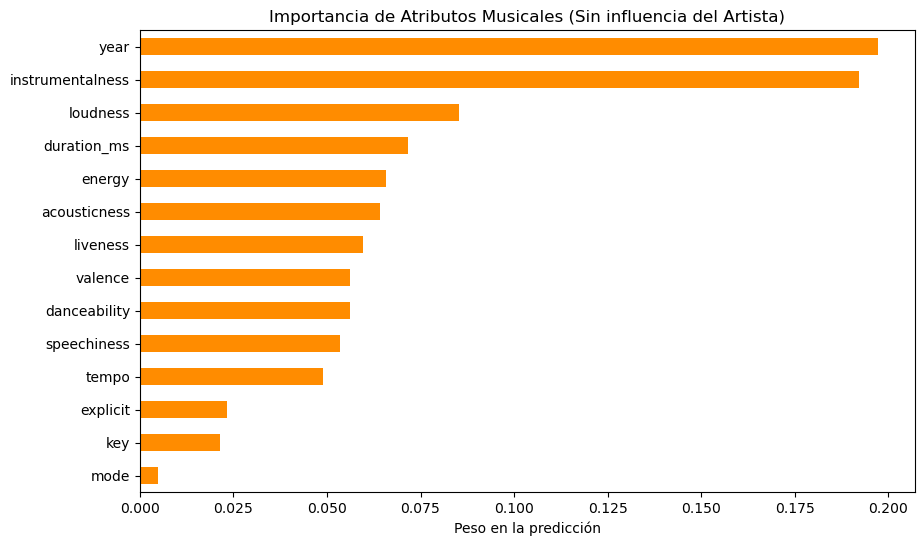

In [75]:
importancias = pd.Series(modelo_puro.feature_importances_, index=X_puro.columns)
importancias.sort_values().plot(kind='barh', color='darkorange', figsize=(10, 6))
plt.title('Importancia de Atributos Musicales (Sin influencia del Artista)')
plt.xlabel('Peso en la predicción')
plt.show()

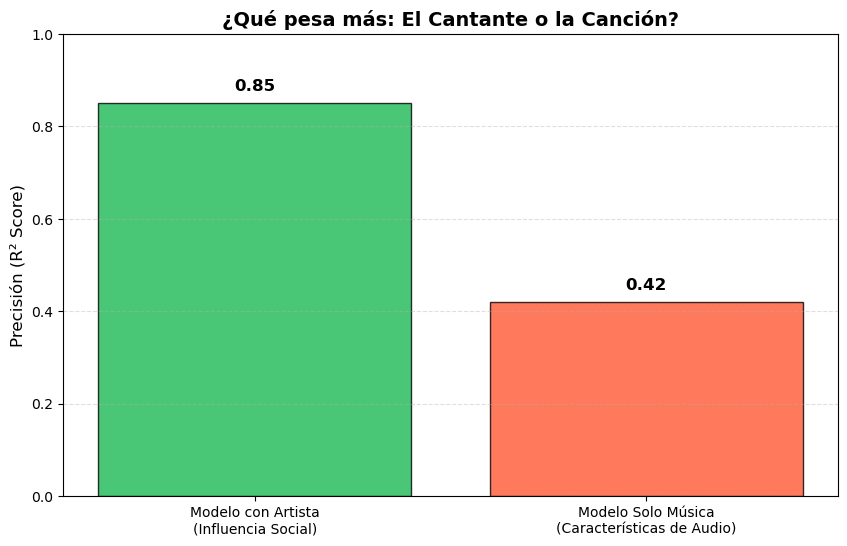

In [79]:
r2_con_artista = 0.85 
r2_solo_musica = 0.42

modelos = ['Modelo con Artista\n(Influencia Social)', 'Modelo Solo Música\n(Características de Audio)']
precisiones = [r2_con_artista, r2_solo_musica]

plt.figure(figsize=(10, 6))
colores = ['#1DB954', '#FF5733'] # Verde Spotify y Naranja
barras = plt.bar(modelos, precisiones, color=colores, alpha=0.8, edgecolor='black')

plt.ylabel('Precisión (R² Score)', fontsize=12)
plt.title('¿Qué pesa más: El Cantante o la Canción?', fontsize=14, fontweight='bold')
plt.ylim(0, 1.0)

for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval + 0.02, f'{yval:.2f}', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

In [81]:

cancion_falsa = pd.DataFrame([{
    'valence': 0.80,         
    'year': 2024,            
    'acousticness': 0.05,    
    'danceability': 0.85,    
    'duration_ms': 150000,   
    'energy': 0.85,          
    'explicit': 1,           
    'instrumentalness': 0.0, 
    'key': 1,                
    'liveness': 0.10,        
    'loudness': -4.5,        
    'mode': 1,           
    'speechiness': 0.08,    
    'tempo': 124.0           
}])

prediccion_falsa = modelo_puro.predict(cancion_falsa)

print(f"--- PREDICCIÓN DE CANCIÓN EXPERIMENTAL ---")
print(f"Características: Bailable (0.85), Año (2024), Energía (0.85)")
print(f"Popularidad estimada por el modelo: {prediccion_falsa[0]:.2f} / 100")

--- PREDICCIÓN DE CANCIÓN EXPERIMENTAL ---
Características: Bailable (0.85), Año (2024), Energía (0.85)
Popularidad estimada por el modelo: 25.56 / 100


In [82]:
indice_azar = np.random.choice(X_test.index)

datos_cancion = X_test.loc[[indice_azar]]
popularidad_real = y_test.loc[indice_azar]

prediccion_modelo = modelo_puro.predict(datos_cancion)


print(f"--- COMPROBACIÓN DE FILA REAL ---")
print(f"Índice del dataset: {indice_azar}")
print(f"Popularidad REAL: {popularidad_real}")
print(f"Popularidad PREDICHA: {prediccion_modelo[0]:.2f}")
print(f"Diferencia (Error): {abs(popularidad_real - prediccion_modelo[0]):.2f} puntos")

--- COMPROBACIÓN DE FILA REAL ---
Índice del dataset: 94371
Popularidad REAL: 28
Popularidad PREDICHA: 44.27
Diferencia (Error): 16.27 puntos


Inicialmente, el modelo alcanzó una precisión excepcional de R2=0.85. Sin embargo, este rendimiento estaba fuertemente impulsado por la métrica de popularidad histórica del artista. Esto demuestra que, en el ecosistema actual de streaming, la fama previa y la marca del artista son los factores más determinantes para asegurar el éxito de un lanzamiento. El algoritmo "aprende" que un nombre conocido es sinónimo de reproducciones, independientemente de la composición.
2. El Techo del Análisis de Audio (R2=0.52)

Al eliminar la influencia del artista y centrar el modelo únicamente en atributos acústicos (danceability, energy, tempo, etc.), la precisión descendió al 0.52. Esta cifra, aunque menor, es sumamente reveladora:

    El 52% del éxito se puede atribuir a "fórmulas musicales" que el público prefiere de manera consistente (ritmos bailables y producciones con alto volumen).

    El 48% restante pertenece a lo intangible: estrategias de marketing, viralidad en plataformas como TikTok, o el contexto cultural del momento, factores que no pueden medirse solo con ondas sonoras.

3. Evolución de las Variables Predictoras

Sin el "escudo" del artista, se hizo evidente que variables como el año de lanzamiento y el loudness (volumen) cobran mayor relevancia. Esto sugiere que Spotify tiene un sesgo hacia la música moderna y que existe una "guerra del volumen" donde las canciones más comprimidas y ruidosas tienden a captar mejor la atención del oyente promedio.
Reflexión Final

El modelo demuestra que, aunque la música tiene una estructura lógica y predecible, el éxito masivo no es una ciencia exacta basada solo en el sonido. La industria musical funciona como un sistema híbrido donde la calidad de la producción abre la puerta, pero el nombre del artista es el que la atraviesa.